# Well Hello Hello, Welcome back again 🫡

### so we in today's lecture we're going to talk about : 
- Linear Regression
- Polynomial Regression


## So just before we dive into Linear regression let's discuss some of the encoding and scaling techniques !

# One-Hot Encoding Refresher 🧠🔥

## What is it? ❓
One-hot encoding is a technique to convert **categorical variables** into a **binary vector** representation. Each category becomes a new binary feature (column), with `1` indicating the presence and `0` otherwise.

## Why use it? 💡
- Machine learning models typically require numerical input.
- Prevents models from interpreting categories as ordinal (e.g., assigning unintended order like "red" > "blue").

## Example 🌟
**Original Data (Category: "Color"):**
| Color  |
|--------|
| Red    |
| Blue   |
| Green  |

**After One-Hot Encoding:**
| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |



-----------------------------------------------

-----------------------------------------------

# Power Transformers & Skewed Data 🔌📊  

## What Are Power Transformers? ❓  
Power transformers reshape data to be more **Gaussian-like**, reducing skewness and improving model performance. They apply **non-linear transformations** to stabilize variance and normalize distributions.  

## Common Power Transformers ⚡  
1. **Box-Cox Transform** – Parametric, optimized for **positive data only**.  
2. **Yeo-Johnson** – Flexible, works on **all real numbers** (positive/negative).   

## Why Use Them? 💡  
- Fixes **right/left skew** for better statistical modeling.  
- Helps algorithms (e.g., linear regression, SVM) that assume normality.  
- Reduces impact of outliers.  

## Example (Box-Cox Transform) 🌟  
**Before (Skewed Data):**  
| Income  |  
|---------|  
| 30,000  |  
| 45,000  |  
| 250,000 |  

**After Box-Cox :**  
| Income_Transformed |  
|--------------------|  
| 3.11               |  
| 3.25               |  
| 4.02               |  

# Standard Scaler 📏✨

## What is Standardization? ❓
Standardization (Z-score normalization) transforms data to have:
- **Mean (μ) = 0**
- **Standard Deviation (σ) = 1**

Formula:  
`z = (x - μ) / σ`

## Why Use Standard Scaler? 💡
- Essential for distance-based algorithms (KNN, SVM, K-Means)
- Helps gradient descent converge faster
- Puts all features on the same scale
- Less affected by outliers than MinMax scaler

## Example 🌟
**Before Scaling:**
| Age | Income (k$) |
|-----|------------|
| 25  | 50         |
| 30  | 80         |
| 40  | 120        |

**After StandardScaler:**
| Age_z | Income_z |
|-------|---------|
| -1.22 | -1.22   |
| -0.24 | -0.24   |
| 1.46  | 1.46    |

## Key Notes ✅
- Use `sklearn.preprocessing.StandardScaler`
- Fit ONLY on training data (avoid data leakage)
- Works best when data is ~normally distributed
- Preserves outliers (unlike MinMax scaler)

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd


data = np.array([[10], [20], [30], [40], [50]], dtype=float)


# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


df = pd.DataFrame({
    'Original': data.squeeze(),
    'Scaled': scaled_data.squeeze()
})


display(df)


,Original,Scaled
0,10.0,-1.414214
1,20.0,-0.707107
2,30.0,0.000000
3,40.0,0.707107
4,50.0,1.414214


## Task 1 🚨 Check also MinMax scaler and what's the difference between it and StandardScaler ?

# Ordinal Encoder ⬆️🔢 (For Ordered Categories Only!)

## What is Ordinal Encoding? ❓
Assigns numerical values to categories **while preserving their inherent order**. Unlike LabelEncoder, this is explicitly for ordinal data where:
- "Small" < "Medium" < "Large"
- "Low" < "Medium" < "High"

## When to Use It? 💡
- ONLY when categories have meaningful order
- Perfect for:
  - Survey responses (1-5 scales)
  - Education levels
  - Size categories
  - Any ranked data

## Example (T-Shirt Sizes) 🌟
**Before Encoding:**
| Size   |
|--------|
| Small  |
| Medium |
| Large  |
| Small  |

**After Encoding (Manual Mapping):**
| Size_Encoded |
|-------------|
| 0           |
| 1           |
| 2           |
| 0           |

## Key Differences from LabelEncoder ✅
1. **Explicit Ordering** (you define the mapping)
2. **No False Assumptions** (unlike automatic label encoding)
3. **Use `sklearn.preprocessing.OrdinalEncoder`**

In [24]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Categorical data in a DataFrame (string column)
df = pd.DataFrame({
    'Category': ['low', 'medium', 'high', 'medium', 'low']
})

# Define encoder with custom order
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
encoded = encoder.fit_transform(df[['Category']])  # <- keep as DataFrame

# Add the result to DataFrame
df['Encoded'] = encoded

display(df)



,Category,Encoded
0,low,0.0
1,medium,1.0
2,high,2.0
3,medium,1.0
4,low,0.0


In [25]:
# Alternative u can encode yourself

df['Category'].replace({'low':0 , "medium" : 1 , "high" : 2} , inplace=True)

display(df['Category'])

0    0
1    1
2    2
3    1
4    0
Name: Category, dtype: int64

## Good old Linear Regression ⚙️

## in this notebook we are going to focus more on the practical part not the theory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True intercept=4, slope=3

# Train linear regression
model = LinearRegression()
model.fit(X, y)

# # Predictions
y_pred = model.predict(X)


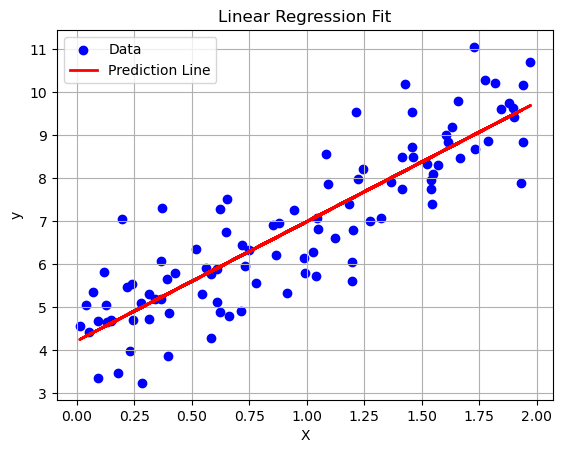

In [34]:
# Visualization
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Prediction Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

## Usually u want to test your model performance after training !

### Every task has it's own metrics to test the model 
- For regression we use the R2 Score !

## 📘 Definition of R² Score (Coefficient of Determination)
"R² measures how well the model explains the variability of the target variable."

In simpler terms:

It tells you how much of the variation in y is explained by your model's predictions.

🔍 Interpretation:
R² Value	Meaning
1.0	Perfect prediction — model explains all variance
0.0	Model explains nothing — same as predicting mean
< 0 (negative)	Model is worse than predicting the mean (very bad 😬)
0.7 - 0.99	Pretty good for most real-world data



-----------------------------------------

## this isn't the end there's also MSE or MAE and adjusted R2 score which is a variation for the R2 score 

### MSE or MAE are cost functions which the model tries to minimize during training


In [36]:
from sklearn.metrics import r2_score , mean_squared_error

# Print learned parameters
print(f"Intercept (w0): {model.intercept_[0]:.2f}")
print(f"Slope (w1): {model.coef_[0][0]:.2f}")
print(f"R2 score AKA model performance : {r2_score(y , y_pred)}")
print(f"Cost function : {mean_squared_error(y , y_pred)}")

Intercept (w0): 4.22
Slope (w1): 2.77
R2 score AKA model performance : 0.7692735413614223
Cost function : 0.8065845639670534


## but wait a minute the equation in the linear regression : 

# Linear Regression Formula 📈

The simple linear regression model:

$$
y = \beta_0 + \beta_1x 
$$

Where:
- $y$: Dependent variable (target)
- $x$: Independent variable (feature)
- $\beta_0$: y-intercept (constant term)
- $\beta_1$: Slope coefficient


### it depends that there's a linear relationship (1st degree) between the target and the features !

## Then what are we going to do if there's a relationship between them but it's from another degree ? 

### then our friend here Linear regression isn't useful in this case 

### We can transform our features a little bit to adjust this issue !

# Polynomial Regression Formula 🧮

The general form of a polynomial regression model:

$$
y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \cdots + \beta_nx^n 
$$

Where:
- $y$: Dependent variable (target)
- $x$: Independent variable (feature)
- $\beta_0$: y-intercept (bias term)
- $\beta_1, \beta_2, ..., \beta_n$: Coefficients for each polynomial term
- $n$: Degree of the polynomial

> **Note:** The equation shows how we can model non-linear relationships while still using linear regression techniques by expanding features into polynomial terms.

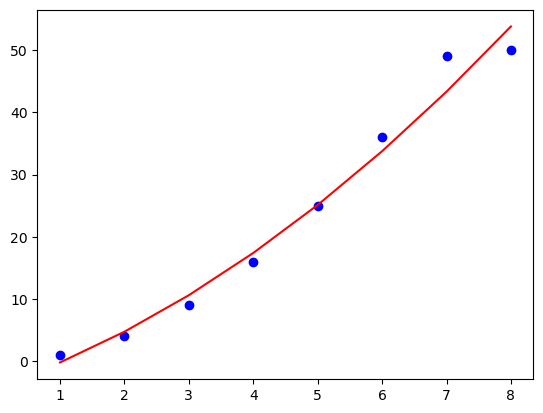

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Sample data (You can change this)
X = np.array([[1], [2], [3], [4], [5] , [6] , [7] , [8]])
y = np.array([1, 4, 9, 16, 25 , 36 , 49 , 50])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transforming the features to include polynomial terms
poly = PolynomialFeatures(degree=2)  # Try different degrees
X_poly_train = poly.fit_transform(X_train) # only fit on the training data to avoid Data leakage
X_poly_test = poly.transform(X_test)

# Fitting Linear Regression to the polynomial data
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Predicting the results
y_pred_poly = lin_reg.predict(X_poly_test)

# Plotting the results
plt.scatter(X, y, color='blue')  # Original data
plt.plot(X, lin_reg.predict(poly.transform(X)), color='red')  # Polynomial regression curve
plt.show()


In [45]:
# Checking performance
print("R^2 Score:", lin_reg.score(X_poly_test, y_test))
print(f"Cost function : {mean_squared_error(y_test , y_pred_poly)}")

R^2 Score: 0.9889007026627219
Cost function : 2.841420118343205


# Resources 🥸

- [Scikit-learn Docs ](https://scikit-learn.org/stable/user_guide.html)
- [Cheat-Sheet](https://media.datacamp.com/legacy/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf)